To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Shortest Path Problem

In this tutorial we will solve shortest path problem using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 01

Considering the operating costs of a machine based on its cumulative usage time, a workshop considers an optional maintenance offer for this machine at the end of term 5 within a finite planning period. The optional maintenance cost of the machine is 63. The machine is planned to be operated for the next 12-period. 

| Cumulative usage time | Operating cost |
| :-------------------: | :------------: |
| 0 | 35 |
| 1 | 40 |
| 2 | 45 |
| 3 | 50 |
| 4 | 55 |
| 5 | 60 |
| 6 | 65 |
| 7 | 70 |
| 8 | 75 |
| 9 | 80 |
| 10 | 85 |
| 11 | 90 |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("0", {"color": "black"}),
    ("1", {"color": "black"}),
    ("2", {"color": "black"}),
    ("3", {"color": "black"}),
    ("4", {"color": "black"}),
    ("5", {"color": "black"}),
    ("6", {"color": "black"}),
    ("7", {"color": "black"}),
    ("7M", {"color": "black"}),
    ("8", {"color": "black"}),
    ("8M", {"color": "black"}),
    ("9", {"color": "black"}),
    ("9M", {"color": "black"}),
    ("10", {"color": "black"}),
    ("10M", {"color": "black"}),
    ("11", {"color": "black"}),
    ("11M", {"color": "black"}),
    ("12", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "0":np.array([0.0,0.0]),
    "1":np.array([1.0,0.0]),
    "2":np.array([2.0,0.0]),
    "3":np.array([3.0,0.0]),
    "4":np.array([4.0,0.0]),
    "5":np.array([5.0,0.0]),
    "6":np.array([6.0,0.0]),
    "7":np.array([7.0,0.0]),
    "7M":np.array([7.0,1.0]),
    "8":np.array([8.0,0.0]),
    "8M":np.array([8.0,1.0]),
    "9":np.array([9.0,0.0]),
    "9M":np.array([9.0,1.0]),
    "10":np.array([10.0,0.0]),
    "10M":np.array([10.0,1.0]),
    "11":np.array([11.0,0.0]),
    "11M":np.array([11.0,1.0]),
    "12":np.array([12.0,0.0])
}

{('0', '1'): Text(0.5, 0.0, '35'),
 ('1', '2'): Text(1.5, 0.0, '40'),
 ('2', '3'): Text(2.5, 0.0, '45'),
 ('3', '4'): Text(3.5, 0.0, '50'),
 ('4', '5'): Text(4.5, 0.0, '55'),
 ('5', '6'): Text(5.5, 0.0, '60'),
 ('6', '7'): Text(6.5, 0.0, '65'),
 ('6', '7M'): Text(6.5, 0.5, '98'),
 ('7', '8'): Text(7.5, 0.0, '70'),
 ('7M', '8M'): Text(7.5, 1.0, '40'),
 ('8', '9'): Text(8.5, 0.0, '75'),
 ('8M', '9M'): Text(8.5, 1.0, '45'),
 ('9', '10'): Text(9.5, 0.0, '80'),
 ('9M', '10M'): Text(9.5, 1.0, '50'),
 ('10', '11'): Text(10.5, 0.0, '85'),
 ('10M', '11M'): Text(10.5, 1.0, '55'),
 ('11', '12'): Text(11.5, 0.0, '90'),
 ('11M', '12'): Text(11.5, 0.5, '60')}

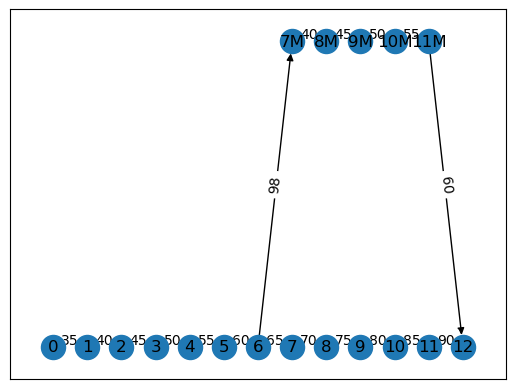

In [5]:
elist = [("0", "1"),
         ("1", "2"),
         ("2", "3"),
         ("3", "4"),
         ("4", "5"),
         ("5", "6"),
         ("6", "7"),
         ("6", "7M"),
         ("7", "8"),
         ("7M", "8M"),
         ("8", "9"),
         ("8M", "9M"),
         ("9", "10"),
         ("9M", "10M"),
         ("10", "11"),
         ("10M", "11M"),
         ("11", "12"),
         ("11M", "12")]
G1.add_edges_from(elist)
eattrs = {("0", "1"): {"weight": 35}, 
          ("1", "2"): {"weight": 40}, 
          ("2", "3"): {"weight": 45}, 
          ("3", "4"): {"weight": 50}, 
          ("4", "5"): {"weight": 55}, 
          ("5", "6"): {"weight": 60}, 
          ("6", "7"): {"weight": 65}, 
          ("6", "7M"): {"weight": 35+63}, 
          ("7", "8"): {"weight": 70}, 
          ("7M", "8M"): {"weight": 40}, 
          ("8", "9"): {"weight": 75}, 
          ("8M", "9M"): {"weight": 45}, 
          ("9", "10"): {"weight": 80}, 
          ("9M", "10M"): {"weight": 50}, 
          ("10", "11"): {"weight": 85}, 
          ("10M", "11M"): {"weight": 55}, 
          ("11", "12"): {"weight": 90}, 
          ("11M", "12"): {"weight": 60}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 18 nodes and 18 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	35
  (1, 2)	40
  (2, 3)	45
  (3, 4)	50
  (4, 5)	55
  (5, 6)	60
  (6, 7)	65
  (6, 8)	98
  (7, 9)	70
  (8, 10)	40
  (9, 11)	75
  (10, 12)	45
  (11, 13)	80
  (12, 14)	50
  (13, 15)	85
  (14, 16)	55
  (15, 17)	90
  (16, 17)	60


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[ 0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 65 98  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 75  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 85  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 90]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 60]
 [ 0  0  0  0  0  0  0  0  0  0

In [9]:
path = nx.shortest_path(G1, source='0', target='12', weight = 'weight', method = 'dijkstra')
print(path)

['0', '1', '2', '3', '4', '5', '6', '7M', '8M', '9M', '10M', '11M', '12']


In [10]:
totalcost = nx.shortest_path_length(G1, source='0', target='12', weight = 'weight', method = 'dijkstra')
print(totalcost)

633


According to a new proposal coming to the workshop, a neighboring workshop wants to rent its new machine from the beginning of the third period until the end of the original planning horizon. The costs for the new machine are given below.

| Cumulative usage time | Operating cost |
| :-------------------: | :------------: |
| 0 | 40 |
| 1 | 40 |
| 2 | 40 |
| 3 | 40 |
| 4 | 40 |
| 5 | 50 |
| 6 | 55 |
| 7 | 60 |
| 8 | 65 |
| 9 | 70 |

In [11]:
G2 = nx.DiGraph()
G2.add_nodes_from([
    ("0", {"color": "black"}),
    ("1", {"color": "black"}),
    ("2", {"color": "black"}),
    ("3", {"color": "black"}),
    ("3R", {"color": "black"}),
    ("4", {"color": "black"}),
    ("4R", {"color": "black"}),
    ("5", {"color": "black"}),
    ("5R", {"color": "black"}),
    ("6", {"color": "black"}),
    ("6R", {"color": "black"}),
    ("7", {"color": "black"}),
    ("7R", {"color": "black"}),
    ("7M", {"color": "black"}),
    ("8", {"color": "black"}),
    ("8R", {"color": "black"}),
    ("8M", {"color": "black"}),
    ("9", {"color": "black"}),
    ("9R", {"color": "black"}),
    ("9M", {"color": "black"}),
    ("10", {"color": "black"}),
    ("10R", {"color": "black"}),
    ("10M", {"color": "black"}),
    ("11", {"color": "black"}),
    ("11R", {"color": "black"}),
    ("11M", {"color": "black"}),
    ("12", {"color": "black"}),
])

In [12]:
nodepos = {
    "0":np.array([0.0,0.0]),
    "1":np.array([1.0,0.0]),
    "2":np.array([2.0,0.0]),
    "3":np.array([3.0,0.0]),
    "3R":np.array([3.0,2.0]),
    "4":np.array([4.0,0.0]),
    "4R":np.array([4.0,2.0]),
    "5":np.array([5.0,0.0]),
    "5R":np.array([5.0,2.0]),
    "6":np.array([6.0,0.0]),
    "6R":np.array([6.0,2.0]),
    "7":np.array([7.0,0.0]),
    "7R":np.array([7.0,2.0]),
    "7M":np.array([7.0,1.0]),
    "8":np.array([8.0,0.0]),
    "8R":np.array([8.0,2.0]),
    "8M":np.array([8.0,1.0]),
    "9":np.array([9.0,0.0]),
    "9R":np.array([9.0,2.0]),
    "9M":np.array([9.0,1.0]),
    "10":np.array([10.0,0.0]),
    "10R":np.array([10.0,2.0]),
    "10M":np.array([10.0,1.0]),
    "11":np.array([11.0,0.0]),
    "11R":np.array([11.0,2.0]),
    "11M":np.array([11.0,1.0]),
    "12":np.array([12.0,0.0])
}

{('0', '1'): Text(0.5, 0.0, '35'),
 ('1', '2'): Text(1.5, 0.0, '40'),
 ('2', '3'): Text(2.5, 0.0, '45'),
 ('2', '3R'): Text(2.5, 1.0, '40'),
 ('3', '4'): Text(3.5, 0.0, '50'),
 ('3R', '4R'): Text(3.5, 2.0, '40'),
 ('4', '5'): Text(4.5, 0.0, '55'),
 ('4R', '5R'): Text(4.5, 2.0, '40'),
 ('5', '6'): Text(5.5, 0.0, '60'),
 ('5R', '6R'): Text(5.5, 2.0, '40'),
 ('6', '7'): Text(6.5, 0.0, '65'),
 ('6', '7M'): Text(6.5, 0.5, '98'),
 ('6R', '7R'): Text(6.5, 2.0, '40'),
 ('7', '8'): Text(7.5, 0.0, '70'),
 ('7R', '8R'): Text(7.5, 2.0, '50'),
 ('7M', '8M'): Text(7.5, 1.0, '40'),
 ('8', '9'): Text(8.5, 0.0, '75'),
 ('8R', '9R'): Text(8.5, 2.0, '55'),
 ('8M', '9M'): Text(8.5, 1.0, '45'),
 ('9', '10'): Text(9.5, 0.0, '80'),
 ('9R', '10R'): Text(9.5, 2.0, '60'),
 ('9M', '10M'): Text(9.5, 1.0, '50'),
 ('10', '11'): Text(10.5, 0.0, '85'),
 ('10R', '11R'): Text(10.5, 2.0, '65'),
 ('10M', '11M'): Text(10.5, 1.0, '55'),
 ('11', '12'): Text(11.5, 0.0, '90'),
 ('11R', '12'): Text(11.5, 1.0, '70'),
 ('11M', '

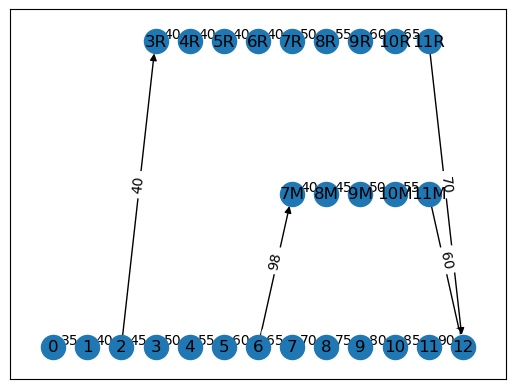

In [13]:
elist = [("0", "1"),
         ("1", "2"),
         ("2", "3"),
         ("2", "3R"),
         ("3", "4"),
         ("3R", "4R"),
         ("4", "5"),
         ("4R", "5R"),
         ("5", "6"),
         ("5R", "6R"),
         ("6", "7"),
         ("6R", "7R"),
         ("6", "7M"),
         ("7", "8"),
         ("7R", "8R"),
         ("7M", "8M"),
         ("8", "9"),
         ("8R", "9R"),
         ("8M", "9M"),
         ("9", "10"),
         ("9R", "10R"),
         ("9M", "10M"),
         ("10", "11"),
         ("10R", "11R"),
         ("10M", "11M"),
         ("11", "12"),
         ("11R", "12"),
         ("11M", "12")]
G2.add_edges_from(elist)
eattrs = {("0", "1"): {"weight": 35}, 
          ("1", "2"): {"weight": 40}, 
          ("2", "3"): {"weight": 45},
          ("2", "3R"): {"weight": 40},
          ("3", "4"): {"weight": 50},
          ("3R", "4R"): {"weight": 40},
          ("4", "5"): {"weight": 55},
          ("4R", "5R"): {"weight": 40},
          ("5", "6"): {"weight": 60},
          ("5R", "6R"): {"weight": 40},
          ("6", "7"): {"weight": 65},
          ("6R", "7R"): {"weight": 40},
          ("6", "7M"): {"weight": 35+63}, 
          ("7", "8"): {"weight": 70},
          ("7R", "8R"): {"weight": 50},
          ("7M", "8M"): {"weight": 40}, 
          ("8", "9"): {"weight": 75},
          ("8R", "9R"): {"weight": 55},
          ("8M", "9M"): {"weight": 45}, 
          ("9", "10"): {"weight": 80},
          ("9R", "10R"): {"weight": 60},
          ("9M", "10M"): {"weight": 50}, 
          ("10", "11"): {"weight": 85},
          ("10R", "11R"): {"weight": 65},
          ("10M", "11M"): {"weight": 55}, 
          ("11", "12"): {"weight": 90},
          ("11R", "12"): {"weight": 70},
          ("11M", "12"): {"weight": 60}}
nx.set_edge_attributes(G2, eattrs)
nx.draw_networkx_nodes(G2, pos = nodepos)
nx.draw_networkx_labels(G2, pos = nodepos)
nx.draw_networkx_edges(G2, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G2, pos = nodepos, edge_labels = nx.get_edge_attributes(G2,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

In [14]:
print(G2)

DiGraph with 27 nodes and 28 edges


In [15]:
G2Adj = nx.adjacency_matrix(G2)
print(G2Adj)

  (0, 1)	35
  (1, 2)	40
  (2, 3)	45
  (2, 4)	40
  (3, 5)	50
  (4, 6)	40
  (5, 7)	55
  (6, 8)	40
  (7, 9)	60
  (8, 10)	40
  (9, 11)	65
  (9, 13)	98
  (10, 12)	40
  (11, 14)	70
  (12, 15)	50
  (13, 16)	40
  (14, 17)	75
  (15, 18)	55
  (16, 19)	45
  (17, 20)	80
  (18, 21)	60
  (19, 22)	50
  (20, 23)	85
  (21, 24)	65
  (22, 25)	55
  (23, 26)	90
  (24, 26)	70
  (25, 26)	60


In [16]:
path2 = nx.shortest_path(G2, source='0', target='12', weight = 'weight', method = 'dijkstra')
print(path2)

['0', '1', '2', '3R', '4R', '5R', '6R', '7R', '8R', '9R', '10R', '11R', '12']


In [17]:
totalcost2 = nx.shortest_path_length(G2, source='0', target='12', weight = 'weight', method = 'dijkstra')
print(totalcost2)

575
